# Dataset Cleaning and Classification Notebook

This notebook gathers and converts our 6 data sets to classification problems, these represent a set of tasks that vary in difficulty as well as provide variation in class balance and size.

In [1]:
import pandas as pd
import seaborn as sns
import os
import math

out_path='data_cleaned/'

In [2]:
# Data set 1: Bace1 inhibitors (enzyme involved in formation of amyloids) 
bace=pd.read_csv('data/bace.csv')
bace.head()
print(bace.shape)
# https://www.collaborativedrug.com/what-is-pic50-2/ support cut-off at 6
print(bace[bace['pIC50']>6].shape) 
bace['active']=bace['pIC50'].apply(lambda x: 1 if x>6 else 0) # set the values 1 or 0 if above or below target potency value

(1513, 595)
(1012, 595)


In [5]:
print(bace.shape)
print(bace['active'].value_counts())
bace.head()

(1513, 596)
1    1012
0     501
Name: active, dtype: int64


,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,active
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2,1
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3,1
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4,1
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5,1


In [3]:
bace.to_csv(os.path.join(out_path,'bace.csv')) # write to cleaned data file

In [9]:
# Tox21 dataset has a variety of various tox end points across the different molecules.
tox21=pd.read_csv('data/tox21.csv.gz',compression='gzip')
#https://tripod.nih.gov/tox/assays for assay descriptions
print(tox21['NR-AhR'].sum()) # pick the HepG2 liver toxicity assay as a good read out (hepatic tox)
tox21.to_csv(os.path.join(out_path,'tox21.csv'))
print(tox21.shape)
print(tox21['NR-AhR'].value_counts())
tox21.head()

768.0
(7831, 14)
0.0    5781
1.0     768
Name: NR-AhR, dtype: int64


,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O


In [14]:
# Clintox is a dataset for FDA approved drugs and if they have shown toxicity or not.
clintox=pd.read_csv('data/clintox.csv.gz')
#print(clintox.CT_TOX.sum())
print(clintox.shape)
print(clintox['CT_TOX'].value_counts())
clintox.head(2)
clintox.describe()

(1484, 3)
0    1372
1     112
Name: CT_TOX, dtype: int64


,FDA_APPROVED,CT_TOX
count,1484.000000,1484.000000
mean,0.936658,0.075472
std,0.243660,0.264240
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [8]:
clintox.head()

,smiles,FDA_APPROVED,CT_TOX
0,*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC,1,0
1,[C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...,1,0
2,[C@H]([C@@H]([C@@H](C(=O)[O-])O)O)([C@H](C(=O)...,1,0
3,[H]/[NH+]=C(/C1=CC(=O)/C(=C\C=c2ccc(=C([NH3+])...,1,0
4,[H]/[NH+]=C(\N)/c1ccc(cc1)OCCCCCOc2ccc(cc2)/C(...,1,0


In [9]:
clintox.to_csv(os.path.join(out_path,'clintox.csv'))

In [15]:
# Solubility is a measure of how soluable a compound is in water
sol_del=pd.read_csv('data/Solubility_delaney-processed.csv')
print(math.log10(0.1))
print(10**(-3.3))
#use 0.1 M for cutoff (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3399483/)
sol_del['binned_sol']=sol_del['measured log solubility in mols per litre'].apply(lambda x: 1 if x >=-1 else 0)
print(sol_del['binned_sol'].shape)
print(sol_del['binned_sol'].sum())
print(sol_del.shape)
print(sol_del['binned_sol'].value_counts())
sol_del.head(5)

-1.0
0.0005011872336272725
(1128,)
185
(1128, 11)
0    943
1    185
Name: binned_sol, dtype: int64


,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,binned_sol
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,1
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,0
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),0
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,0


In [11]:
sol_del.to_csv(os.path.join(out_path,'sol_del.csv'))

In [17]:
# LogD is a measure of a compounds lipophilicity with a desired range for drug activity being neither too polar, nor too greasy
logD=pd.read_csv('data/deepchem_Lipophilicity.csv')
# filter based on Ghose filter: https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five
logD['drug_like']=logD['exp'].apply(lambda x: 1 if (x >= -0.4) & (x <= 5.6) else 0)
print(logD.shape)
print(logD['drug_like'].value_counts())
logD.head(5)

(4200, 4)
1    4055
0     145
Name: drug_like, dtype: int64


,CMPD_CHEMBLID,exp,smiles,drug_like
0,CHEMBL596271,3.54,Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14,1
1,CHEMBL1951080,-1.18,COc1cc(OC)c(cc1NC(=O)CSCC(=O)O)S(=O)(=O)N2C(C)...,0
2,CHEMBL1771,3.69,COC(=O)[C@@H](N1CCc2sccc2C1)c3ccccc3Cl,1
3,CHEMBL234951,3.37,OC[C@H](O)CN1C(=O)C(Cc2ccccc12)NC(=O)c3cc4cc(C...,1
4,CHEMBL565079,3.10,Cc1cccc(C[C@H](NC(=O)c2cc(nn2C)C(C)(C)C)C(=O)N...,1


In [13]:
logD.to_csv(os.path.join(out_path,'deepchem_Lipophilicity.csv'))

HIV_active
0    39684
1     1443
dtype: int64
(41127, 3)


<AxesSubplot:xlabel='HIV_active', ylabel='Count'>

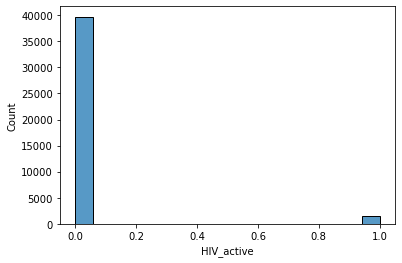

In [18]:
df=pd.read_csv('data/HIV.csv')
print(df.value_counts('HIV_active'))
print(df.shape)
df.isna().sum()
sns.histplot(df,x='HIV_active')

In [15]:
df.to_csv(os.path.join(out_path,'HIV.csv'))

In [16]:
df.head()

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
